<a href="https://colab.research.google.com/github/john-s-butler-dit/CaseStudy_PredatorPrey/blob/master/09_SIR_Model-Interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIR Differential Equations


In this notebook we will model the spread of disease using the Kermack-McKendrick Model model which is a compartment model.

In [1]:
## Library
import numpy as np
import math 
import matplotlib.pyplot as plt
# @title Figure Settings
import IPython.display as ipd
from matplotlib import gridspec

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'

# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")
my_layout = widgets.Layout()

The model is a system of three non-linear first order differential equations:
\begin{equation}
\begin{array}{cl}
\frac{dS}{dt}=-\frac{\beta IS}{N},\\
\frac{dI}{dt}=\frac{\beta IS}{N}-\gamma I,\\
\frac{dR}{dt}=\gamma I
\end{array}
\end{equation}
where 
S is the people who are susceptible in the population, 
I is the number of people infected, 
R is the number of removed population (either by death or recovery), and 
N is the sum of these three $$ N=S(t_0)+I(t_0)+R(t_0).$$
$\beta$ is the infection rate, and $\gamma$ is the recovery rate.
$$ R_{0}={\frac{\beta }{\gamma }},$$

the so-called basic reproduction number (also called basic reproduction ratio).


## Discrete Domain 
To numiercally approximate the solution we discretise the continuous domain using a step size, $dt=0.001$, 
which gives
\begin{equation}
t_i=0+i dt,
\end{equation}
for $i=0,...n$.
The figure below illustrate the discrete domain.

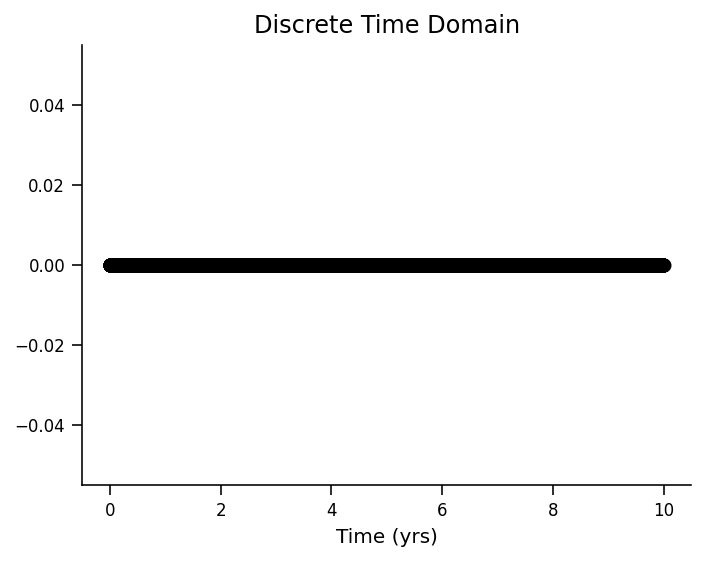

In [ ]:
dt=0.001
t=np.arange(0,10+dt+/2,dt)
fig = plt.figure(1,figsize=(5,4))
ax = fig.add_subplot(1,1,1)
ax.plot(t,0*t,'o:',color='k')
ax.set_xlabel('Time (yrs)')
plt.title('Discrete Time Domain')
plt.show()

We numerically approximate the differential equation using Eulers method to give the difference equation
\begin{equation}
S[i+1] = S[i]+ dt*\big(-beta*S[i]*I[i]/N \big)
\end{equation}

\begin{equation}
I[i+1] = I[i]+ dt*\big(\beta*S[i]*I[i] /N- gamma I[i] \big)
\end{equation}

\begin{equation}
R[i+1] = R[i]+ dt*\big(gamma I[i] \big)
\end{equation}


where $dt$ is the stepsize and  $H[i]$ and $L[i]$ is the numerical approximation of the susceptible $S(t_i)$, infected $I(t_i)$  and recovered $R(t_i)$ at time $t_i$, for $i=0,...,n$


In [ ]:
def SIR(beta,gamma):
    """
    Args:
  
    """
    dt=0.001
    t=np.arange(0,10+dt/2,dt)

    n=len(t) # Number of Steps
    S=np.zeros(n) # Numerical Solution Hares
    S[0]=99 # Intial Hare population
    I=np.zeros(n) # Numerical Solution Lynxes
    I[0]=1# Initial Lynx population
    R=np.zeros(n) # Numerical Solution Lynxes
    R[0]=0# Initial Lynx population

    N=100

    for i in range (0,n-1):
        S[i+1]=S[i]+dt*(-beta*S[i]*I[i]/N) 
        I[i+1]=I[i]+dt*(beta*S[i]*I[i]/N-gamma*I[i])# INSERT EQUATION HERE 
        R[i+1]=R[i]+dt*gamma*I[i]
    ## Plotting Figure
        ## Plotting Figure
    fig, [ax1, ax2] =plt.subplots(1,2,figsize=(16,4), gridspec_kw={'width_ratios': [2, 1]})
    ax1.plot(t,S,':',color='green',label='Sus')
    ax1.plot(t,I,':',color='red',label='Inf')
    ax1.plot(t,R,':',color='blue',label='Rec')
    ax1.legend()
    ax1.set_xlabel('Time (yrs)')
    ax1.set_ylabel('Population (tens of thousands)')

    ax2.plot(I,S,'-',color='black',label='I vs S')
    ax2.plot(I,R,'-',color='red',label='I vs R')
    ax2.set_xlabel('Infected Population (tens of thousands)')
    ax2.set_ylabel('Population (tens of thousands)')
    ax2.legend(loc='best')
    plt.tight_layout()

    plt.show()

## Results


In [4]:
my_layout.width = '450px'
@widgets.interact(
    beta=widgets.FloatSlider(1.1, min=0., max=2., step=.1, layout=my_layout),
    gamma=widgets.FloatSlider(0.4, min=0.00, max=2.0, step=.1, layout=my_layout)
)
def Pop_widget(beta,gamma):
  SIR(beta,gamma)
  plt.show()

interactive(children=(FloatSlider(value=1.1, description='beta', layout=Layout(width='450px'), max=2.0), Float…

# References

[1] Weisstein, Eric W. "Kermack-McKendrick Model." From MathWorld--A Wolfram Web Resource. https://mathworld.wolfram.com/Kermack-McKendrickModel.html

[2]  Wikipedia contributors. (2021, February 28). Compartmental models in epidemiology. In Wikipedia, The Free Encyclopedia. Retrieved 18:12, March 15, 2021, from https://en.wikipedia.org/w/index.php?title=Compartmental_models_in_epidemiology&oldid=1009414539
